In [2]:
import pandas as pd
import numpy as np

In [3]:
input_path = "/Users/blazdobravec/Documents/FACULTY/DOC/RW1/PERSONAL/RL_Concept_DSO_Network/src/data/env_data/voltage_train_data.csv"
output_action_path = "/Users/blazdobravec/Documents/FACULTY/DOC/RW1/PERSONAL/RL_Concept_DSO_Network/src/data/env_data/action_train_data.csv"

df = pd.read_csv(input_path, index_col=0)
df_act = pd.read_csv(output_action_path, index_col=0)

In [4]:
df_act.columns = ["a1", "a2", "a3", "a4", "a5", "a6", "a7"]

In [5]:
# zip the dataframes
df_out = pd.concat([df, df_act], axis=1)
df_out

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,a1,a2,a3,a4,a5,a6,a7
0,1.03,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,...,1.029654,1.029654,1.029654,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.03,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,...,1.029654,1.029654,1.029654,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.03,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,...,1.029654,1.029654,1.029654,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.03,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,...,1.029654,1.029654,1.029654,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.03,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,...,1.029654,1.029654,1.029654,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470417,1.03,1.021568,1.023610,1.025730,1.028355,1.026274,1.025579,1.025354,1.025211,1.025136,...,1.028028,1.026916,1.027976,0.0,0.0,0.0,0.0,0.0,0.0,0.0
470418,1.03,1.012543,1.015190,1.017313,1.026393,1.018310,1.012299,1.004791,1.000091,0.997623,...,1.024831,1.026211,1.026268,0.0,0.0,0.0,0.0,0.0,0.0,0.0
470419,1.03,1.020365,1.022052,1.023655,1.027942,1.025279,1.021030,1.017098,1.015559,1.014751,...,1.026859,1.027918,1.027490,0.0,0.0,0.0,0.0,0.0,0.0,0.0
470420,1.03,1.023567,1.024776,1.026088,1.028544,1.026643,1.025144,1.023730,1.022998,1.022613,...,1.027885,1.028371,1.027220,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# check if we have any NaNs
df_out.isna().sum().sum()

690

In [7]:
# drop any row that has NaN
df_out = df_out.dropna()

In [8]:
# check if we have any NaNs
df_out.isna().sum().sum()

0

In [9]:
#locate the ones where any of a_i if not 0
active_index = df_out.loc[(df_out['a1'] != 0) | (df_out['a2'] != 0) | (df_out['a3'] != 0) | (df_out['a4'] != 0) | (df_out['a5'] != 0) | (df_out['a6'] != 0) | (df_out['a7'] != 0)].index
#locate non active ones
non_active_index = df_out.loc[(df_out['a1'] == 0) & (df_out['a2'] == 0) & (df_out['a3'] == 0) & (df_out['a4'] == 0) & (df_out['a5'] == 0) & (df_out['a6'] == 0) & (df_out['a7'] == 0)].index

In [10]:
len(non_active_index), len(active_index)

(413603, 56796)

In [11]:
#shuffle the non_active_index and only keep len(active_index) of them
np.random.shuffle(list(non_active_index))
non_active_index = non_active_index[:len(active_index)]

In [12]:
len(non_active_index), len(active_index)

(56796, 56796)

In [13]:
# take all the active and non active ones 
df_out = df_out.loc[active_index.union(non_active_index)]
df_out.reset_index(drop=True, inplace=True)
df_out

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,a1,a2,a3,a4,a5,a6,a7
0,1.03,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,...,1.029654,1.029654,1.029654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,1.03,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,...,1.029654,1.029654,1.029654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,1.03,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,...,1.029654,1.029654,1.029654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,1.03,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,...,1.029654,1.029654,1.029654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,1.03,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,...,1.029654,1.029654,1.029654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113587,1.03,1.031044,1.032099,1.032946,1.031409,1.020809,1.031560,1.029483,1.028814,1.028462,...,1.028164,1.030903,1.031376,0.000000,0.000000,0.000000,0.451339,0.200329,0.052318,0.06071
113588,1.03,1.032724,1.034124,1.035561,1.031222,1.014331,1.034217,1.032203,1.030930,1.030262,...,1.029842,1.030986,1.031001,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.00100
113589,1.03,1.031845,1.033362,1.034533,1.031449,1.029124,1.032455,1.029343,1.027497,1.026527,...,1.031000,1.030509,1.025918,0.000000,0.000000,0.162444,0.362317,0.000000,0.000000,0.00000
113590,1.03,1.035240,1.035449,1.035688,1.031525,1.031037,1.032366,1.027392,1.024390,1.022813,...,1.030401,1.030729,1.031133,0.010976,0.002025,0.173104,0.332544,0.006976,0.007938,0.00000


In [14]:
# create the X and y
X = df_out.iloc[:, :-7]
y = df_out.iloc[:, -7:]

# train, test validation split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((72698, 30), (22719, 30), (18175, 30), (72698, 7), (22719, 7), (18175, 7))

In [15]:
# create the NN model with pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# create a neural network that will clasify between 7 actions between 0 and 1
class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_size)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.sigmoid(self.fc3(x))
        return x

In [16]:
# create a dataloader
from torch.utils.data import TensorDataset, DataLoader

train_data = TensorDataset(torch.from_numpy(X_train.values).float(), torch.from_numpy(y_train.values).float())
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

val_data = TensorDataset(torch.from_numpy(X_val.values).float(), torch.from_numpy(y_val.values).float())
val_loader = DataLoader(val_data, batch_size=64, shuffle=True)

test_data = TensorDataset(torch.from_numpy(X_test.values).float(), torch.from_numpy(y_test.values).float())
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

In [17]:
# create the model
model = Net(X_train.shape[1], y_train.shape[1])

# define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# train the model and calculate loss 
epochs = 20
train_losses, val_losses = [], []
for e in range(epochs):
    running_loss = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        output = model.forward(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        val_loss = 0
        accuracy = 0
        with torch.no_grad():
            model.eval()
            for inputs, labels in val_loader:
                output = model.forward(inputs)
                val_loss += criterion(output, labels)
        model.train()
        train_losses.append(running_loss/len(train_loader))
        val_losses.append(val_loss/len(val_loader))
        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Validation Loss: {:.3f}.. ".format(val_loss/len(val_loader)))

Epoch: 1/20..  Training Loss: 0.007..  Validation Loss: 0.004.. 
Epoch: 2/20..  Training Loss: 0.004..  Validation Loss: 0.004.. 
Epoch: 3/20..  Training Loss: 0.004..  Validation Loss: 0.004.. 
Epoch: 4/20..  Training Loss: 0.004..  Validation Loss: 0.004.. 
Epoch: 5/20..  Training Loss: 0.004..  Validation Loss: 0.004.. 
Epoch: 6/20..  Training Loss: 0.004..  Validation Loss: 0.003.. 
Epoch: 7/20..  Training Loss: 0.003..  Validation Loss: 0.003.. 
Epoch: 8/20..  Training Loss: 0.003..  Validation Loss: 0.003.. 
Epoch: 9/20..  Training Loss: 0.003..  Validation Loss: 0.002.. 
Epoch: 10/20..  Training Loss: 0.003..  Validation Loss: 0.002.. 
Epoch: 11/20..  Training Loss: 0.003..  Validation Loss: 0.002.. 
Epoch: 12/20..  Training Loss: 0.002..  Validation Loss: 0.002.. 
Epoch: 13/20..  Training Loss: 0.002..  Validation Loss: 0.002.. 
Epoch: 14/20..  Training Loss: 0.002..  Validation Loss: 0.002.. 
Epoch: 15/20..  Training Loss: 0.002..  Validation Loss: 0.001.. 
Epoch: 16/20..  Tra

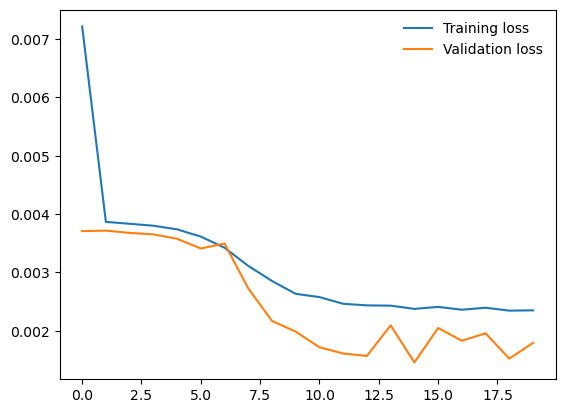

In [18]:
import matplotlib.pyplot as plt
# plot the losses
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend(frameon=False)

In [19]:
# test the model 
test_loss = 0
accuracy = 0
with torch.no_grad():
    model.eval()
    for inputs, labels in test_loader:
        output = model.forward(inputs)
        test_loss += criterion(output, labels)

print("Test Loss: {:.4f} ".format(test_loss/len(test_loader)))


Test Loss: 0.0018 


In [20]:
X_test.values[:21]

array([[1.03      , 1.01892917, 1.02105786, 1.02297789, 1.02718653,
        1.01943303, 1.02190743, 1.02030426, 1.0199079 , 1.01969966,
        1.01952625, 1.02662679, 1.02601002, 1.02590058, 1.02585799,
        1.01002891, 1.01950547, 1.02144656, 1.02687165, 1.01685109,
        1.00293111, 1.01942556, 1.02621916, 1.0266099 , 1.02197011,
        1.02297702, 1.02531428, 1.02460824, 1.02612087, 1.02707972],
       [1.03      , 1.03534366, 1.03565021, 1.03639897, 1.0315471 ,
        1.03124947, 1.03434643, 1.03127255, 1.03029604, 1.02978301,
        1.02957053, 1.0391093 , 1.04398953, 1.04514721, 1.04572307,
        1.03406179, 1.03287105, 1.03464909, 1.03114706, 1.03481428,
        1.03062595, 1.02944715, 1.04574261, 1.04704592, 1.04626238,
        1.03637876, 1.05307443, 1.03126279, 1.03059558, 1.03110298],
       [1.03      , 1.02302986, 1.0236763 , 1.0248755 , 1.02838955,
        1.0264667 , 1.02264889, 1.01931441, 1.01751991, 1.01657716,
        1.01605303, 1.02797096, 1.02752784, 1.

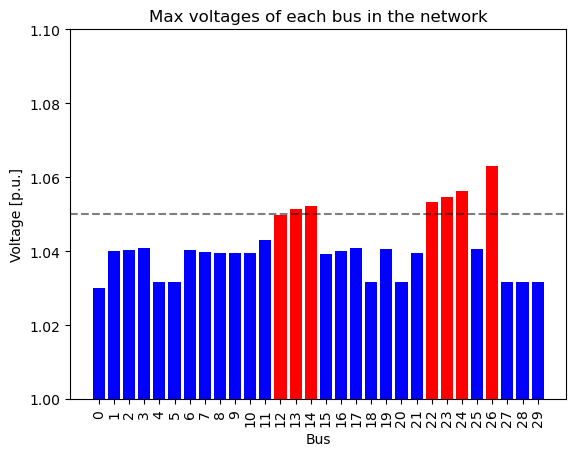

In [21]:
color = ['blue' if i < 1.045 else 'red' for i in X_test.max().values]
# fig, axs = plt.subplots(1, 2, figsize=(20, 10))
plt.figsize=(10,10)
plt.bar(X_test.max().index, X_test.max().values, color=color)
plt.axhline(y=1.05, color='black', linestyle='--', alpha=0.5)
plt.xticks(rotation=90)
# # limit
plt.ylim(1., 1.1)
plt.title('Max voltages of each bus in the network')
plt.xlabel('Bus')
plt.ylabel('Voltage [p.u.]')
plt.savefig('/Users/blazdobravec/Documents/FACULTY/DOC/RW1/PERSONAL/RL_Concept_DSO_Network/src/results_data/max_voltages.pdf')
# plt.show()

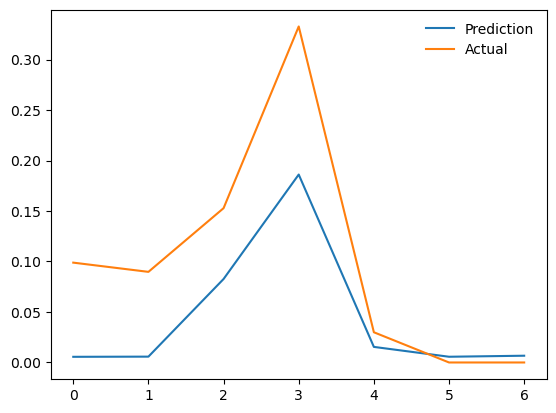

In [22]:
# example of a prediction
i = 21
# print(model.forward(torch.from_numpy(X_test.values[i]).float()))
# print(y_test.values[i])

# plot the prediction
plt.plot(model.forward(torch.from_numpy(X_test.values[i]).float()).detach().numpy(), label='Prediction')
plt.plot(y_test.values[i], label='Actual')
plt.legend(frameon=False)

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


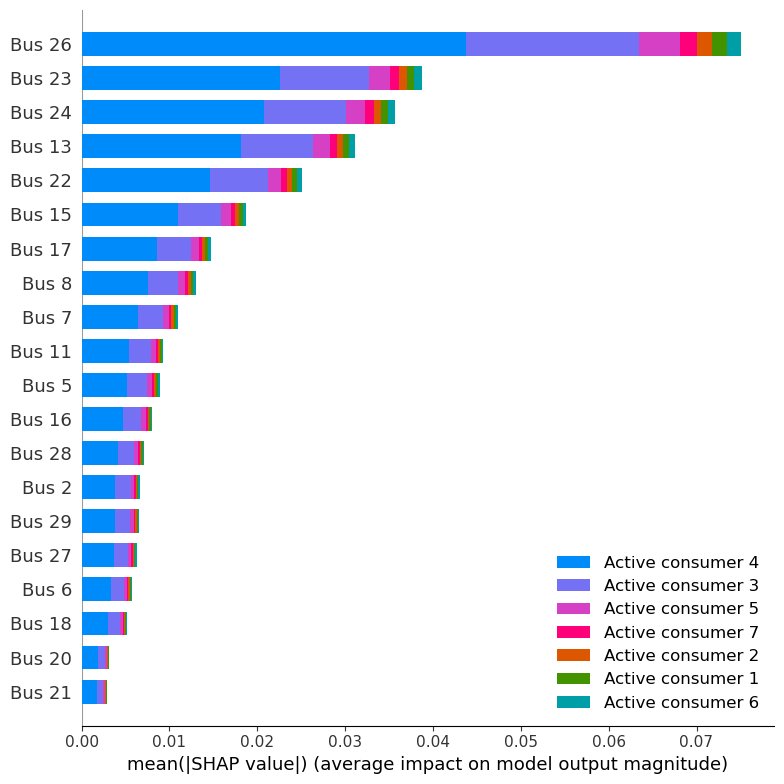

In [44]:
# DEEP SHAP explanation
import shap
# set font size
plt.rcParams.update({'font.size': 12})

# create a function that will return the prediction of the model
batch = next(iter(test_loader))
images, _ = batch

background = images[:60]
test_images = images[60:64]

e = shap.DeepExplainer(model, background)
shap_values = e.shap_values(test_images)
features_names = ["Bus " + el for el in X_test.columns]
class_names = ["Active consumer 1", "Active consumer 2", "Active consumer 3", "Active consumer 4", "Active consumer 5", "Active consumer 6", "Active consumer 7"]
# plot the shap values
fig = shap.summary_plot(shap_values, X_test.values, feature_names=features_names, class_names=class_names, plot_type="bar", plot_size=(8,8), show=False)
plt.savefig('/Users/blazdobravec/Documents/FACULTY/DOC/RW1/PERSONAL/RL_Concept_DSO_Network/src/results_data/shap_values.pdf', dpi=700)

In [40]:
X_test.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29'],
      dtype='object')

In [34]:
len(shap_values)

7

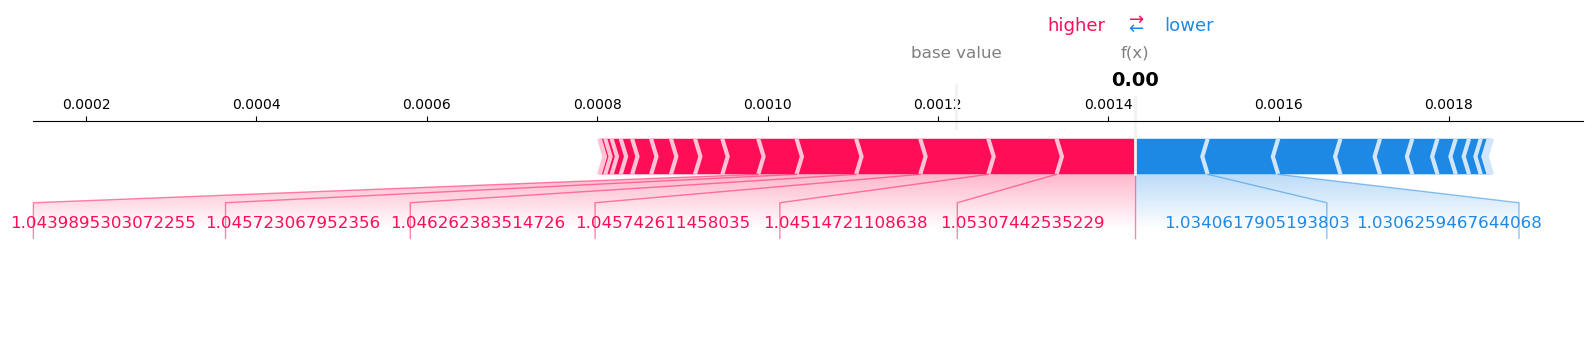

In [111]:
# visualize the first prediction's explanation
shap.force_plot(e.expected_value[1], shap_values[1][0], X_test.values[1], matplotlib=True)

In [112]:
# run initjs
shap.initjs()

In [113]:
shap.force_plot(e.expected_value[0], shap_values[0])

In [114]:
data = df_out[96:160]
X_data = torch.tensor(data.iloc[:, :-7].values, dtype=torch.float)
y_data = torch.tensor(data.iloc[:, -7:].values, dtype=torch.float)

In [115]:
shap_values50 = e.shap_values(X_data)

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


In [116]:
shap.force_plot(e.expected_value[0], shap_values50[0])

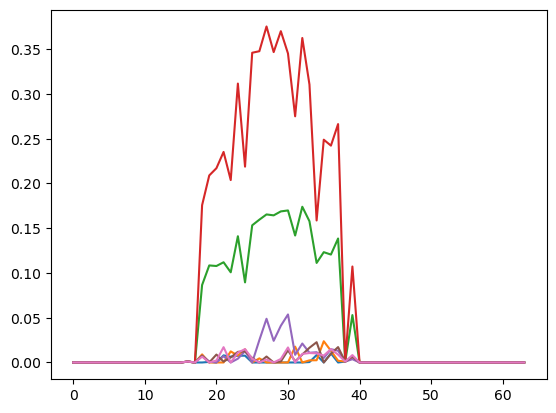

In [117]:
# plot actual y_data
plt.plot(y_data.detach().numpy(), label='Actual')